In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
%matplotlib inline
plt.style.use('ggplot')

# Plotting helper and experiment classs for problem 1,2 and 3
from helpers import *
# Various descents for problem 1, 2 and 3
from descents import *

> Choosen convergence criteria for problem 1, 2 and 3 is change in function value after update over 5 continous iterations $\leq$ treshold. Threshold choosen is can be as parameter to descent function call, if nothing is passed, then 1e-4 is choosen as default. Threshold is value also printed after convergence along with plot. 

## Problem 1

- Samples are generated as follows:
    - $x_1, x_2$ are uniformly sampled in $[-10, 10]$, 500 such samples form the training set
    - Using $y = 3x_1 + 4x_2 + \epsilon$ we get target value, where $\epsilon$ is gaussian noise with mean 0 and variance 0.01
- Objective function to be minimized is Mean Squared Error (since this is a regression problem)
    - $J(a, b) = \frac{1}{500} \Sigma_{i=1}^{500} (ax_{1i} + bx_{2i} - (3x_{1i} + 4x_{2i} + \epsilon))^2$
    - Writing it in vector form, 
        - Let vector of samples be $X \in R^{3 x 500}$ where each each column represents $\begin{bmatrix} x_{1i} \\ x_{2i} \\ \epsilon \end{bmatrix}$
        - Distribution from which samples are generated be $D = \begin{bmatrix} 3 \\ 4 \\ 1 \end{bmatrix}$
        - Now the objective function $J(a, b) = \frac{1}{500} \Sigma_{i=1}^{500} (\begin{bmatrix} a & b & 0 \end{bmatrix} \begin{bmatrix} x_{1i} \\ x_{2i} \\ \epsilon \end{bmatrix} - (\begin{bmatrix} 3 & 4 & 1 \end{bmatrix} \begin{bmatrix} x_{1i} \\ x_{2i} \\ \epsilon \end{bmatrix} ))^2$
        - It can be simplified in vector form as as $J(W) = \frac{1}{500} ((W - D)^{T}X)(X^{T}(W - D))$, where $W = \begin{bmatrix} a \\ b \\ 0 \end{bmatrix}$
    - Jacobian of objective $J^{'}(W) = \frac{2}{500} XX^{T}(W - D)$
    - Hessian of objective $J^{''}(W) = \frac{2}{500} XX^{T}$

Generating data with random noise

In [3]:
# x1, x2 in [-10, 10]
samples_X = (np.random.rand(3, 500) - 0.5)*2*10
# epsilon in Normal mean 0 variance 0.01 i.e, std 0.1
samples_X[2] = np.random.normal(loc=0, scale=0.1, size=500)
print(samples_X.shape)

(3, 500)


3D plot of objective function with parameters

In [4]:
def obj_func(a, b):
    WDiff = (np.array([a, b, 0]) - np.array([3, 4, 1])).reshape((3,1))
    prod = np.dot(WDiff.transpose(), samples_X)
    return np.linalg.norm(prod)**2 / 500

def grad_obj_func(a, b):
    WDiff = (np.array([a, b, 0]) - np.array([3, 4, 1])).reshape((3,1))
    xxt = np.dot(samples_X, samples_X.transpose())
    return np.dot(xxt, WDiff).squeeze()[:2] / 250

<ipython-input-4-cf5620d8e1d2>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  WDiff = (np.array([a, b, 0]) - np.array([3, 4, 1])).reshape((3,1))


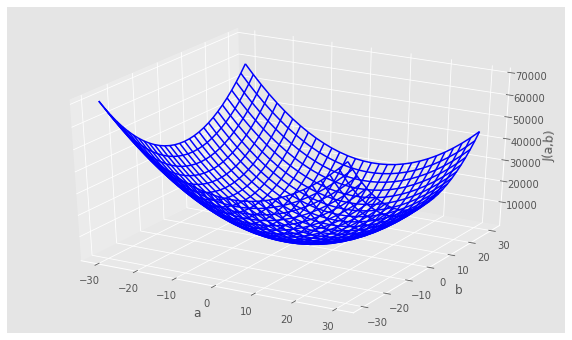

In [5]:
def plot_3d_obj():
    a = np.linspace(-30, 30, 30)
    b = np.linspace(-30, 30, 30)
    X, Y = np.meshgrid(a, b)
    Z = obj_func(X, Y)
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(X, Y, Z, color='blue')
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('J(a,b)')
    plt.show()

plot_3d_obj()

<ipython-input-4-cf5620d8e1d2>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  WDiff = (np.array([a, b, 0]) - np.array([3, 4, 1])).reshape((3,1))


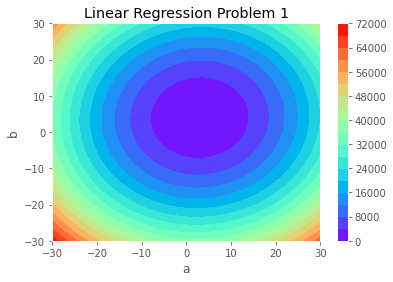

In [6]:
prob1_dict = {
    'func': obj_func,
    'grad': grad_obj_func,
    'label': 'Linear Regression Problem 1',
    # Following configurations are for generating nice looking plot for obj function
    'x_range': (-30, 30),
    'y_range': (-30, 30),
    'lin_count': 100,
    'lines': 20,
    'ab': True,
}

get_plot(prob1_dict)

### Optimal Learning Rate $\eta_{opt}$ Calculation
- Given objective $J$ is quadriatic, thus for $\eta_{opt}$ for each dimension is given by inverse of $[J^{''}(W)]^{-1}$, where Hessian of objective $J^{''}(W) = \frac{2}{500} XX^{T}$
- Since we are using constant step size in all dimensions, we take optimal step size as $\eta_{opt} = \frac{1}{\max_{i} \lambda_i}$ where $\lambda_i$s are eigen values of hessian
- We compute this optimal learning rate using np.lingalg as follows and then use it for further questions

In [7]:
hessian = (1/250) * np.dot(samples_X, samples_X.transpose())
lr_opt = 1/max(np.linalg.eigvals(hessian))
print(lr_opt)

0.01502653808354391


> For the following comparaision based on multiple of $\eta_{opt}$, we wantedly choosen a specific initialization of parameters a = -27, b = -3 so that we can qualitatively compare the plots like how descents move and number of iterations. If random initialization is prefered, can remove first parameter of descent call.

### Constant Step Size of 0.9/2 lr_opt

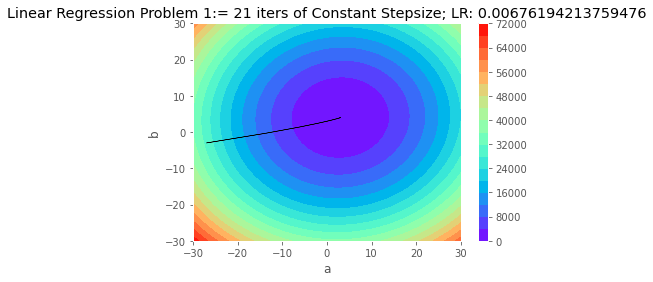

Abs change in postition in this update:  [1.27599842e-04 9.52974352e-05]
At:  [2.99842284 3.99939195]  has value:  0.00906509421533016
Converged, change in function value after update over 5 continous iterations <= 0.0001


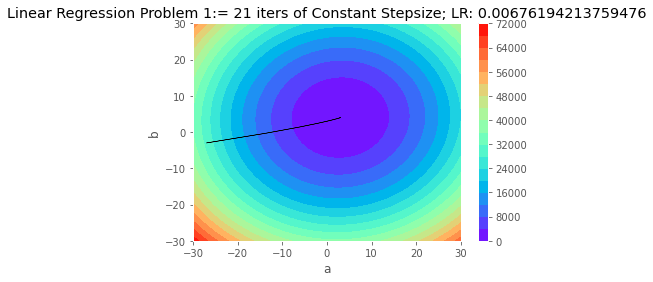

In [8]:
e = Experiment(prob1_dict, const_stepsize(0.9*lr_opt/2))
errors = e.descent(np.array([-27, -3]), get_err=True)

Error vs Epoch Curve

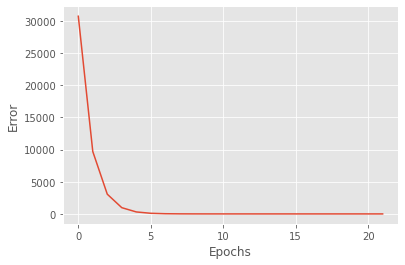

In [9]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### Constant Step Size of 1.5/2 lr_opt

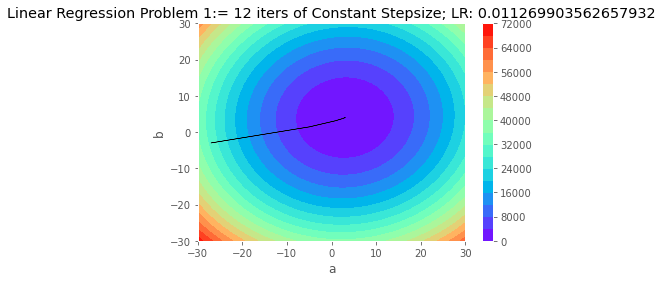

Abs change in postition in this update:  [1.37569195e-05 1.66263140e-05]
At:  [2.99858315 3.99951926]  has value:  0.009063658638870296
Converged, change in function value after update over 5 continous iterations <= 0.0001


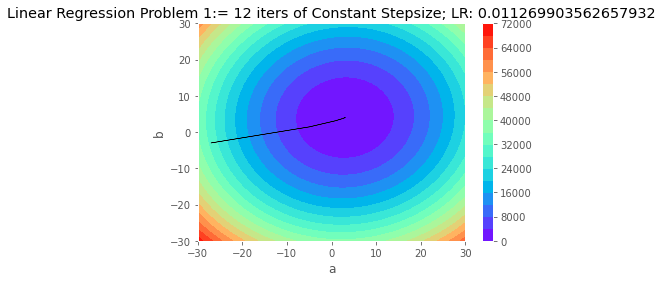

In [10]:
e = Experiment(prob1_dict, const_stepsize(1.5*lr_opt/2))
errors = e.descent(np.array([-27, -3]), get_err=True)

Error vs Epoch Curve

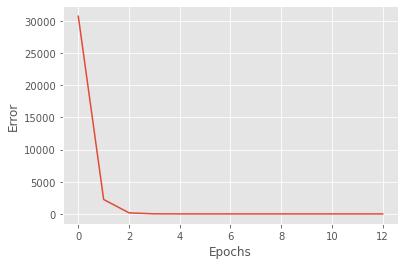

In [11]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### Constant Step Size of lr_opt

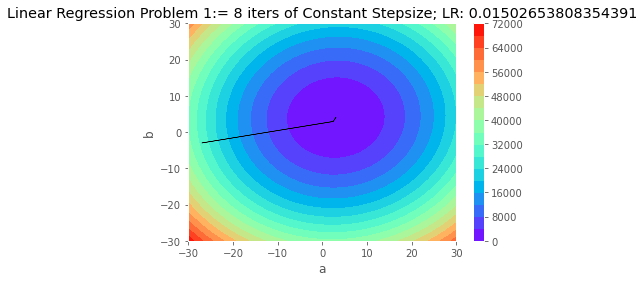

Abs change in postition in this update:  [2.52802681e-08 4.63118157e-08]
At:  [2.9985886  3.99952638]  has value:  0.009063656121561663
Converged, change in function value after update over 5 continous iterations <= 0.0001


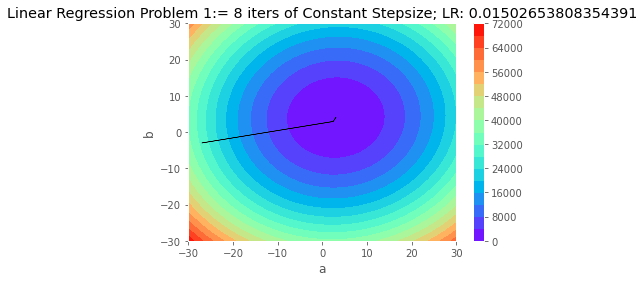

In [12]:
e = Experiment(prob1_dict, const_stepsize(lr_opt))
errors = e.descent(np.array([-27, -3]), get_err=True)

Error vs Epoch Curve

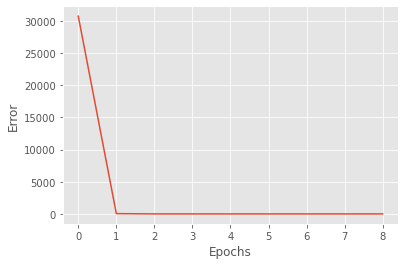

In [13]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### Constant Step Size of 1.5 lr_opt

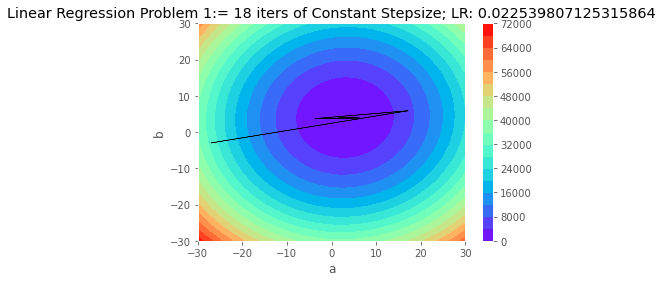

Abs change in postition in this update:  [0.00023446 0.00011926]
At:  [2.9985106  3.99956642]  has value:  0.009063911888772026
Converged, change in function value after update over 5 continous iterations <= 0.0001


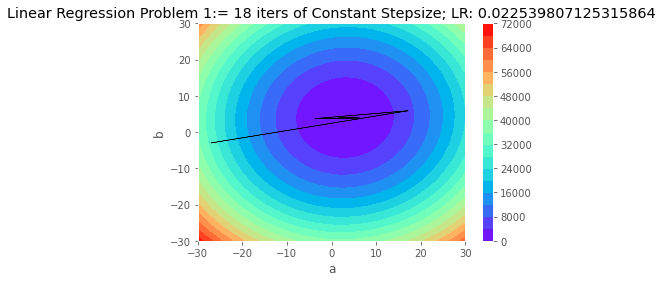

In [14]:
e = Experiment(prob1_dict, const_stepsize(1.5 * lr_opt))
errors = e.descent(np.array([-27, -3]), get_err=True)

Error vs Epoch Curve

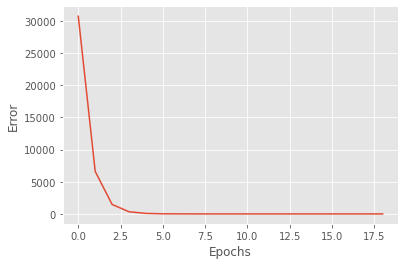

In [15]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## Problem 2

Rosenbrock function $f(x, y) = x^2 + 100(y - x^2)^2$

Its jacobian $J = \begin{bmatrix} 2x(1 - 200(y-x^2)) & 200(y-x^2) \end{bmatrix} $


In [16]:
def rosen_func(x, y):
    return x*x + 100 * (y - x*x)**2

def grad_rosen(x, y):
    tp = 200*(y - x*x)
    return np.array([2*x*(1-tp), tp])

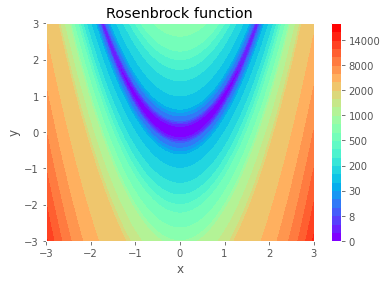

In [17]:
rosen_dict = {
    'func': rosen_func,
    'grad': grad_rosen,
    'label': 'Rosenbrock function',
    # Following configurations are for generating nice looking plot for Rosenbrock
    'x_range': (-3, 3),
    'y_range': (-3, 3),
    'lin_count': 100,
    'lines': 20,
    'bounds': np.hstack([np.arange(0, 10, 2.5), np.arange(10, 50, 10), np.arange(100, 500, 100), np.arange(500, 1000, 200), np.arange(1000, 2000, 400), np.arange(2000, 20000, 2000)])
}

get_plot(rosen_dict)

### Constant Step Size

Random initialized descent

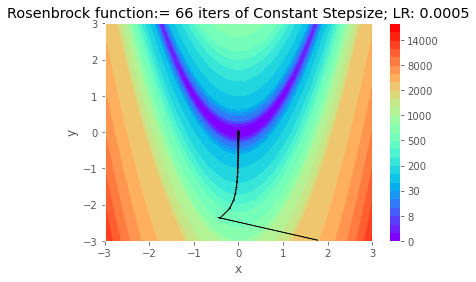

Abs change in postition in this update:  [2.34402612e-06 2.76112854e-04]
At:  [-0.00150776 -0.00248274]  has value:  0.0006198001261845654
Converged, change in function value after update over 5 continous iterations <= 0.0003


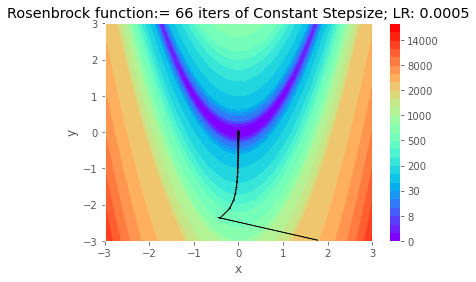

In [18]:
e = Experiment(rosen_dict, const_stepsize(5e-4))
e.descent(tresh=3e-4)

### Polyak Momentum

Random initialized descent

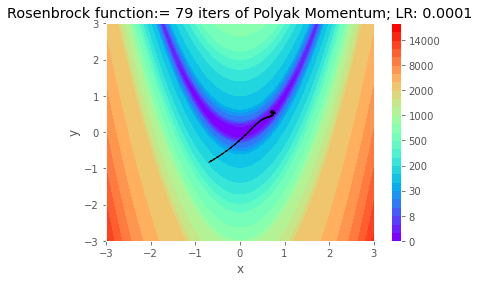

Abs change in postition in this update:  [0.00024735 0.00075572]
At:  [0.73441005 0.53800538]  has value:  0.539541103513182
Converged, change in function value after update over 5 continous iterations <= 0.0003


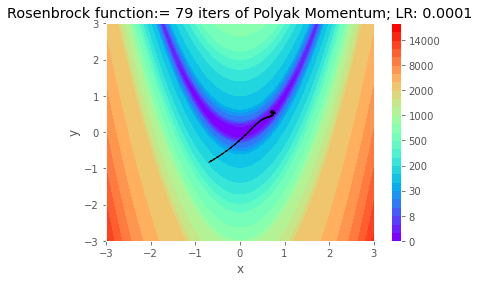

In [21]:
e = Experiment(rosen_dict, polyak_method(1e-4))
e.descent(tresh=3e-4)

### Nesterov Accelerated Gradient

Random initialized descent

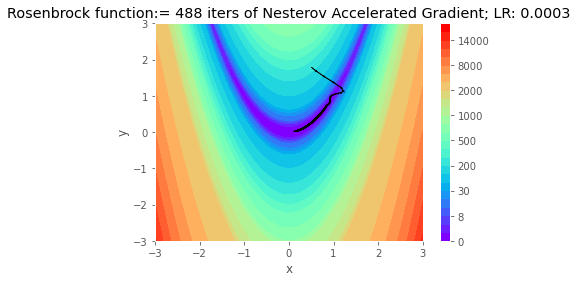

Abs change in postition in this update:  [0.00090527 0.00029286]
At:  [0.15873567 0.02564124]  has value:  0.025216745923444334
Converged, change in function value after update over 5 continous iterations <= 0.0003


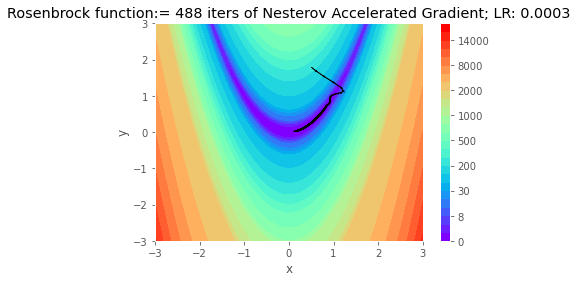

In [31]:
e = Experiment(rosen_dict, nesterov_method(3e-4))
e.descent(tresh=3e-4)

### Adam Optimizer

Random Initialization descent

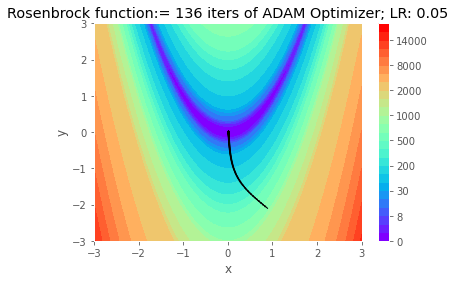

Abs change in postition in this update:  [1.68072569e-05 2.66392580e-04]
At:  [ 0.01691606 -0.00324298]  has value:  0.0015316299130920406
Converged, change in function value after update over 5 continous iterations <= 0.0003


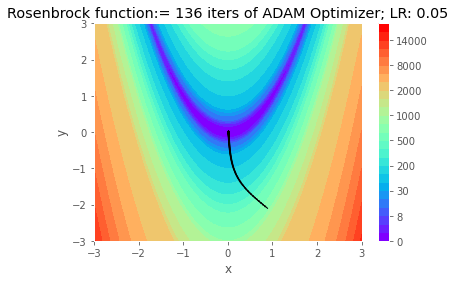

In [35]:
e = Experiment(rosen_dict, adam_descent(5e-2, 0.7))
e.descent(tresh=3e-4)

## Problem 3

Given function $f(x,y) =  \frac{50 \left(x^{2} + y^{2}\right)^{3}}{9} - \frac{209 \left(x^{2} + y^{2}\right)^{2}}{18} + \frac{59 (x^{2} + y^{2})}{9}$

Its Jacobian $J = \left[\begin{matrix}\frac{100 x \left(x^{2} + y^{2}\right)^{2}}{3} - \frac{418 x \left(x^{2} + y^{2}\right)}{9} + \frac{118 x}{9} & \frac{100 y \left(x^{2} + y^{2}\right)^{2}}{3} - \frac{418 y \left(x^{2} + y^{2}\right)}{9} + \frac{118 y}{9}\end{matrix}\right]$

In [36]:
def prob3_func(x, y):
    t = x**2 + y**2
    return 50*(t**3)/9 - 209*(t**2)/18 + 59*t/9

def grad_prob3(x, y):
    t = x**2 + y**2
    return np.array([100*x*(t**2)/3 - 418*x*t/9 + 118*x/9, 100*y*(t**2)/3 - 418*y*t/9 + 118*y/9])

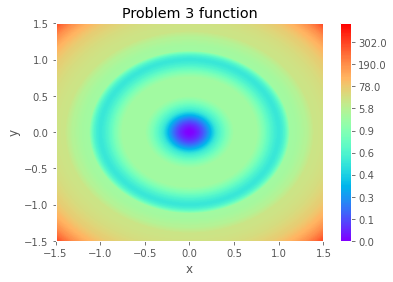

In [37]:
prob3_dict = {
    'func': prob3_func,
    'grad': grad_prob3,
    'label': 'Problem 3 function',
    # Following configurations are for generating nice looking plot for given function
    'x_range': (-1.5, 1.5),
    'y_range': (-1.5, 1.5),
    'lin_count': 100,
    'lines': 20,
    'bounds': np.hstack([np.arange(0, 0.5, 0.005), np.arange(0.5, 1, 0.009), np.arange(1, 10, 0.4), np.arange(10, 400, 4)])
}

get_plot(prob3_dict)

### Constant Step Size

Random initialized descent

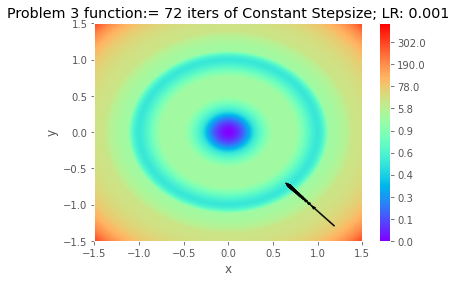

Abs change in postition in this update:  [0.0001878  0.00020493]
At:  [ 0.67991727 -0.74196593]  has value:  0.500840077295237
Converged, change in function value after update over 5 continous iterations <= 0.0001


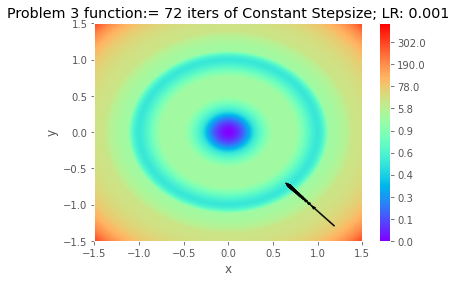

In [40]:
e = Experiment(prob3_dict, const_stepsize(1e-3))
e.descent()

### Polyak Momentum

Random initialized descent

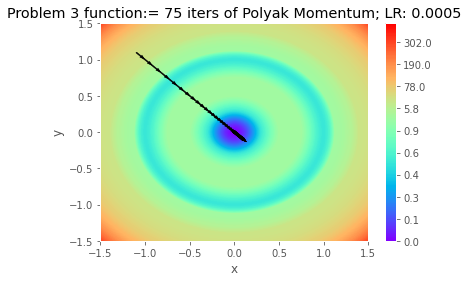

Abs change in postition in this update:  [0.00101378 0.00101323]
At:  [-0.00223433  0.0022331 ]  has value:  6.541652690861804e-05
Converged, change in function value after update over 5 continous iterations <= 0.0001


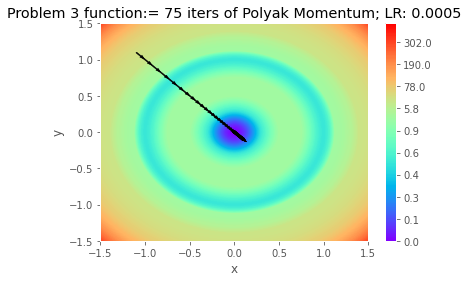

In [47]:
e = Experiment(prob3_dict, polyak_method(5e-4))
e.descent()

### Nesterov Accelerated Gradient

Random initialized descent

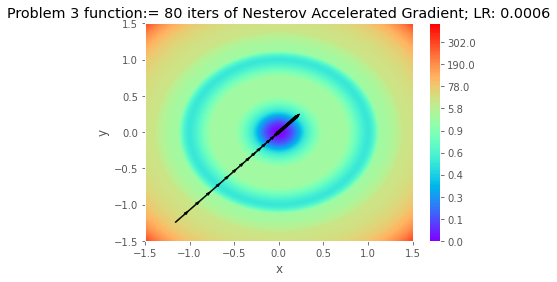

Abs change in postition in this update:  [0.00018647 0.00020039]
At:  [-0.01351128 -0.01452038]  has value:  0.0025771333972514346
Converged, change in function value after update over 5 continous iterations <= 0.0001


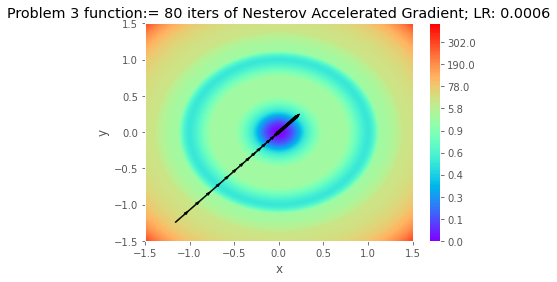

In [56]:
e = Experiment(prob3_dict, nesterov_method(6e-4))
e.descent()

### Adam Optimizer

Random Initialization descent

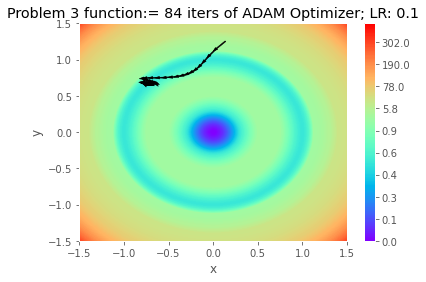

Abs change in postition in this update:  [0.00059901 0.0001344 ]
At:  [-0.74271785  0.66621816]  has value:  0.5001029360549403
Converged, change in function value after update over 5 continous iterations <= 0.0001


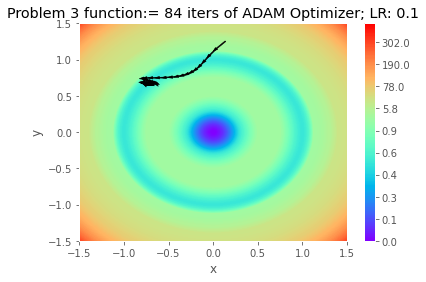

In [58]:
e = Experiment(prob3_dict, adam_descent(1e-1))
e.descent()

## Problem 4

### Data

In [4]:
data = np.array([
    0.28, 1.31, -6.2, 0,
    0.07, 0.58, -0.78, 0,
    1.54, 2.01, -1.63, 0,
    -0.44, 1.18, -4.31, 0,
    -0.81, 0.21, 5.73, 0,
    1.52, 3.16, 2.77, 0,
    2.20, 2.42, -0.19, 0,
    0.91, 1.94, 6.21, 0,
    0.65, 1.93, 4.38, 0,
    -0.26, 0.82, -0.96, 0,
    0.011, 1.03, -0.21, 1,
    1.27, 1.28, 0.08, 1,
    0.13, 3.12, 0.16, 1,
    -0.21, 1.23, -0.11, 1,
    -2.18, 1.39, -0.19, 1,
    0.34, 1.96, -0.16, 1,
    -1.38, 0.94, 0.45, 1,
    -0.12, 0.82, 0.17, 1,
    -1.44, 2.31, 0.14, 1,
    0.26, 1.94, 0.08, 1
]).reshape(20,4) # 0 for w1, 1 for w2

### Definition of three layer NN

- This implementation of 3 layer nn and training mechanism is generic and supoprts multiple activation functions as well
- This was done so that it can also be used with Problem 5 on Wine Quality Dataset

In [5]:
class UnoptimziedThreeLayerNN:
    """This is normal numpy implementation without optimization. We define next cython optimized ThreeLayerNN"""
    def __init__(self, input_dim, hidden_dim, act_dict, bias=True, low_init=-0.01, high_init=0.01, custom_initialization=None):
        self.bias = bias
        self.params = {
            'W1': np.random.uniform(low=low_init, high=high_init, size=(input_dim + (1 if bias else 0), hidden_dim)),
            'W2': np.random.uniform(low=low_init, high=high_init, size=(hidden_dim, 1)),
            'storage': {'W1': {}, 'W2': {}} # Used by optimizer
        }
        if custom_initialization is not None:
            self.params['W1'].fill(custom_initialization['W1'])
            self.params['W2'].fill(custom_initialization['W2'])
        self.act_dict = act_dict

    def forward(self, inp: np.ndarray):
        '''inp: np.ndarray(batch_size x input_dim)'''
        self.inp = np.hstack([inp, np.ones((inp.shape[0], 1))]) if self.bias else inp
        self.bef_act = np.dot(self.inp, self.params['W1'])
        self.after_act = self.act_dict['func'](self.bef_act)
        self.out = self.after_act.dot(self.params['W2'])
        return self.out

    def backward(self, grad: np.ndarray):
        '''grad = gradient of Loss wrt output : np.ndarray(batch_size x 1)'''
        # Vectors in backward pass are stored in tensor flattened form, reshaped at last
        dW2 = np.dot(self.after_act.transpose(), grad)
        dafter_act = np.vstack([grad] * self.params['W2'].shape[0])
        dbef_act = np.dot(self.act_dict['jacobian'](self.bef_act).transpose(), dafter_act)
        store = []
        for x in range(self.inp.shape[1]):
            for y in range(self.params['W1'].shape[1]):
                dWxy = np.zeros((self.inp.shape[0], self.params['W1'].shape[1]))
                for i in range(self.inp.shape[0]):
                    dWxy[i, y] = self.inp[i, x]
                store.append(dWxy.flatten().reshape(-1,1))
        dW1 = np.dot(np.hstack(store).transpose(), dbef_act)
        return {
            'W1': dW1.reshape(self.params['W1'].shape),
            'W2': dW2.reshape(self.params['W2'].shape),
        }


#### Cython optimization for backward pass

Tested on raining of three layer NN on problem 5 Wine dataset for 5 epochs using division size of 32. Note updates are done in batch fashion only. Division size is number of examples for which gradient is accumulated. This is done as whole dataset will cause memory issues for batch udpates due to large matrix ops and Kernel dies.
- Division size 32 was fastest out of 16, 32, 64, 256 for non cython based only np implementation. Hence choosen for comparision
    - Only numpy ops: **5.99 s** ± 284 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)
    - Cython optimized: **3.22 s** ± 130 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)
    - 2x speed up was observed with 32 div sie cython code over only numpy based one
    - But it was observed that 8 was optimal div size for cython code and it has achieved
        - **770 ms** ± 122 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)
        - **Effectively 6x speed up by using cython and optimal div size wrt hidden dim size**
    - This probably is due to cache having some impact in array access of dW (bottleneck nested loop in backward pass)
- For each run optimal division size is choosen when ever required as per hid dim size. This was choosen experimentally by tring few values
    - It was observed that the scale of div size * hidden dimensions was consistent for optimal div size
    - Follwing were optimal div sizes - 25 dim - 8, 50 dim - 4, 75 dim - 33
    - Reason can again be attributed to cache for array access

In [6]:
%load_ext cython

In [7]:
%%cython

import numpy as np
cimport numpy as np
cimport cython

class ThreeLayerNN:
    def __init__(self, input_dim, hidden_dim, act_dict, bias=True, low_init=-0.01, high_init=0.01, custom_initialization=None):
        self.bias = bias
        self.params = {
            'W1': np.random.uniform(low=low_init, high=high_init, size=(input_dim + (1 if bias else 0), hidden_dim)),
            'W2': np.random.uniform(low=low_init, high=high_init, size=(hidden_dim, 1)),
            'storage': {'W1': {}, 'W2': {}} # Used by optimizer
        }
        if custom_initialization is not None:
            self.params['W1'].fill(custom_initialization['W1'])
            self.params['W2'].fill(custom_initialization['W2'])
        self.act_dict = act_dict
    
    def forward(self, inp: np.ndarray):
        '''inp: np.ndarray(batch_size x input_dim)'''
        self.inp = np.hstack([inp, np.ones((inp.shape[0], 1))]) if self.bias else inp
        self.bef_act = np.dot(self.inp, self.params['W1'])
        self.after_act = self.act_dict['func'](self.bef_act)
        self.out = self.after_act.dot(self.params['W2'])
        self.cydW = np.zeros((self.inp.shape[1] * self.params['W1'].shape[1], self.inp.shape[0] * self.params['W1'].shape[1]), dtype=np.float32) # do not allocate mem in cython
        return self.out
    
    @cython.boundscheck(False) # turn off bounds-checking for entire function
    @cython.wraparound(False)  # turn off negative index wrapping for entire function
    def backward(self, np.ndarray[np.double_t, ndim=2] grad):
        '''grad = gradient of Loss wrt output : np.ndarray(batch_size x 1)'''
        # Vectors in backward pass are stored in tensor flattened form, reshaped at last
        
        # cpython optimizations
        cdef int w2shape0 = self.params['W2'].shape[0]
        cdef int w2shape1 = self.params['W2'].shape[1]
        cdef int w1shape0 = self.params['W1'].shape[0]
        cdef int w1shape1 = self.params['W1'].shape[1]
        cdef int inpshape0 = self.inp.shape[0]
        cdef int inpshape1 = self.inp.shape[1]
        cdef np.ndarray[np.double_t, ndim=2] inp = self.inp
        cdef np.ndarray[np.float32_t, ndim=2] dW = self.cydW
        
        cdef int x, y, i, cntr
        
        dW2 = np.dot(self.after_act.T, grad)
        dafter_act = np.vstack([grad] * w2shape0) 
        dbef_act = np.dot(self.act_dict['jacobian'](self.bef_act).T, dafter_act)
        cntr = 0
        
        # Botle neck nested loop
        # GOT 2x speed up with div size 32 by using cython on problem 5
        # Effective 6x speed up by using 8 div size, optimal div size
        for x in range(inpshape1):
            for y in range(w1shape1):
                for i in range(inpshape0):
                    dW[cntr, i*w1shape1 + y] = inp[i, x]
                cntr += 1

        dW1 = np.dot(dW, dbef_act)
        return {
            'W1': dW1.reshape((w1shape0, w1shape1)),            
            'W2': dW2.reshape((w2shape0, w2shape1)),
        }
    

In [35]:
def train_loop(nn, loss_fn, optimizer, train_x, train_y, epochs=10, div_size=256, print_epochs=-1):
    # Memory exceeds and kernel crashes when using all examples at once
    # Hence dividing examples into subsets, accumulating gradients and doing batch update
    x_div = np.split(train_x, list(range(div_size, train_x.shape[0], div_size)))
    y_div = np.split(train_y, list(range(div_size, train_y.shape[0], div_size)))
    losses = []
    for ep in range(epochs):
        total_loss = 0
        # Gradient accumulator of parameters
        grad_acuumlator = copy.deepcopy(nn.params)
        del grad_acuumlator['storage']
        # Zero gradient
        for k in grad_acuumlator:
            grad_acuumlator[k] = np.zeros(grad_acuumlator[k].shape)
        # Iterate through divisions
        for x, y in zip(x_div, y_div):
            out = nn.forward(x)
            y = y.reshape(out.shape)
            loss, grad = loss_fn(out, y)
            total_loss += loss
            upd = nn.backward(grad)
            # Store gradients
            for k in upd:
                grad_acuumlator[k] += upd[k]
        avg_loss = total_loss / train_x.shape[0]
        if print_epochs != -1 and (ep+1)%print_epochs == 0:
            print(f"Epoch {ep+1} - Avg Loss of all examples: {avg_loss}")
        losses.append(avg_loss)
        if np.isnan(losses[-1]):
            print("Stopping iterations, loss reached nan")
            return losses
        if ep +1 != epochs:
            # Update Params
            optimizer['func'](nn.params, grad_acuumlator, optimizer['hparams'])
    return losses
            

> Following is implementation of ADAM, with a flag force_sgd which disables ADAM Specific things and sticks back to vanilla SGD

In [9]:
def opt_adam(params, grads, hparams):
    d = hparams['delta']
    g = hparams['gamma']
    npd, npg = hparams['power_optm'][0]*d, hparams['power_optm'][1]*g
    hparams['power_optm'] = (npd, npg)
    for k in params:
        if k == 'storage':
            continue
        if hparams['force_sgd']:
            d = 0 # Force to sgd
            g = 0 # Force to sgd
        params['storage'][k]['m_store'] = d * params['storage'][k].get('m_store', np.zeros(grads[k].shape)) + (1 - d) * grads[k]
        params['storage'][k]['v_store'] = g * params['storage'][k].get('v_store', np.zeros(grads[k].shape)) + (1 - g) * np.square(grads[k])
        norm_m = params['storage'][k]['m_store'] / (1 - npd)
        norm_v = params['storage'][k]['v_store'] / (1 - npg)
        if hparams['force_sgd']:
            norm_v = 1 # Force to sgd
            norm_m = params['storage'][k]['m_store']  # Force to sgd
        params[k] -= hparams['lr'] * np.divide(norm_m, np.sqrt(norm_v) + hparams['elipson'])

def bp_adam(lr=0.001, delta=0.9, gamma=0.999, elipson=1e-8, force_sgd=False):
    return {
        'hparams': {
            'lr': lr,
            'delta': delta,
            'gamma': gamma,
            'elipson': elipson,
            'power_optm': (1, 1),
            'force_sgd': force_sgd
        },
        'func': opt_adam,
        'label': 'ADAM Optimizer'
    }

In [10]:
sigmoid_func = {
    'func': lambda x: 1 / (1 + np.exp(-x)),
    'jacobian': lambda x: np.diag(np.divide(np.exp(-x), np.square(1+np.exp(-x)) + 1e-8).flatten())
}

In [11]:
x, y = data[:, :3], data[:, 3]
y.reshape(20,1)
print(x.shape, y.shape)

(20, 3) (20,)


In [12]:
def binary_ce_loss(out, ref):
    # Assuming each ouptut of network is 1 dim output of class probability being 1
    # Output needs to be passed through sigmoid as our NN doens't apply activations at last layer
    ref = ref.flatten()
    out = out.flatten()
    out = np.reciprocal(1 + np.exp(-out))
    func = np.where(ref == 1, out, 1-out)
    # Numerically stable log
    loss = np.where(func < 1e-20, 0, -np.log(func))
    # Add some epsilon to prevent overflow
    rec = np.reciprocal(func + 1e-20)
    grad = np.where(ref == 1, -rec, rec)
    return np.sum(loss), grad.reshape(-1, 1)

### Random init of weights in -1 to 1

The following code block is unpredictable due to random init. Some times it converges other times, calculations become unstable and overflows occur. One such screenshot and reasoning is provided in section where difference b/w learning curves is explained.

Epoch 1000 - Avg Loss of all examples: 0.6261076067286326
Epoch 2000 - Avg Loss of all examples: 0.6209185235915949


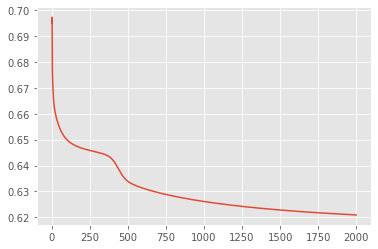

In [13]:
nn = ThreeLayerNN(x.shape[1], 1, sigmoid_func, low_init=-1.0, high_init=1.0)
losses = train_loop(nn, binary_ce_loss, bp_adam(1e-1, force_sgd=True), x, y, 2000, 8, print_epochs=1000)
plt.plot(losses)
plt.show()

### Given init scheme

Epoch 1000 - Avg Loss of all examples: 0.6286124364826093
Epoch 2000 - Avg Loss of all examples: 0.6276739120489179


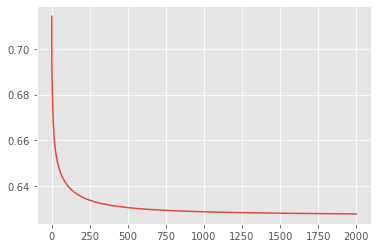

In [14]:
nn = ThreeLayerNN(x.shape[1], 1, sigmoid_func, custom_initialization={'W1': 0.5, 'W2': -0.5})
losses = train_loop(nn, binary_ce_loss, bp_adam(1e-1, force_sgd=True), x, y, 2000, 8, print_epochs=1000)
plt.plot(losses)
plt.show()

### Difference between curves

- In our implementation of cross entropy and gradients we have taken care to handle of instability due to log and reciprocal or divide in sigmoid in code above to ensure error isn't in implementation
- With random initialization we observed the a possiblity of being in a bad position which results in numerical unstablilites in calculations leading to loss becoming NaN and not learning or irregular jumping was observed. Screenshots attached below

- Following are few instances behaviours observed
    - Numerical instability
    
    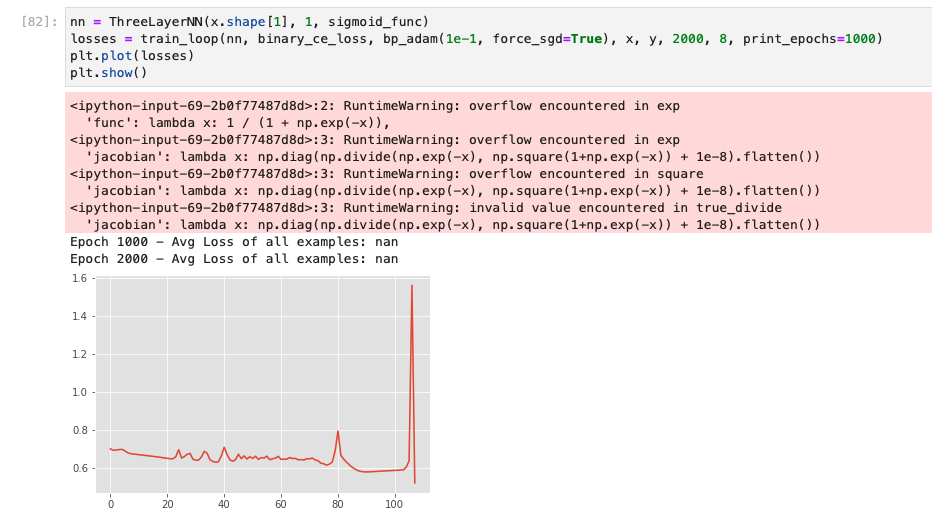
    
    - Irregular loss curves, high movements
    
    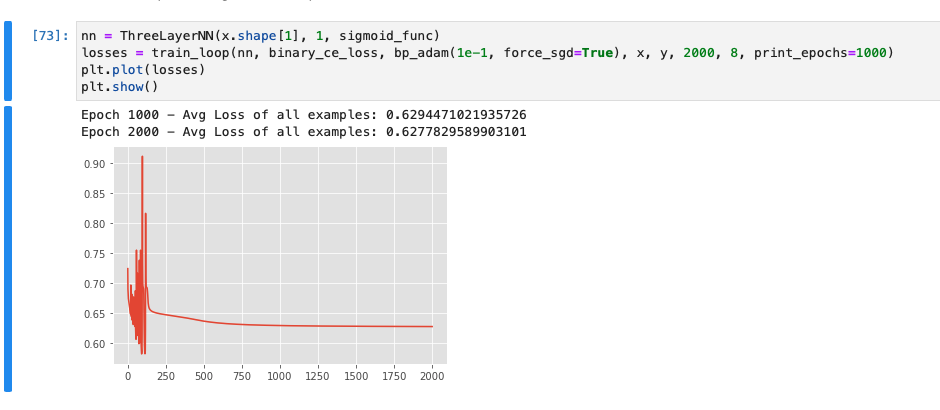
    
    - Almost normal curve but with flat region
    
    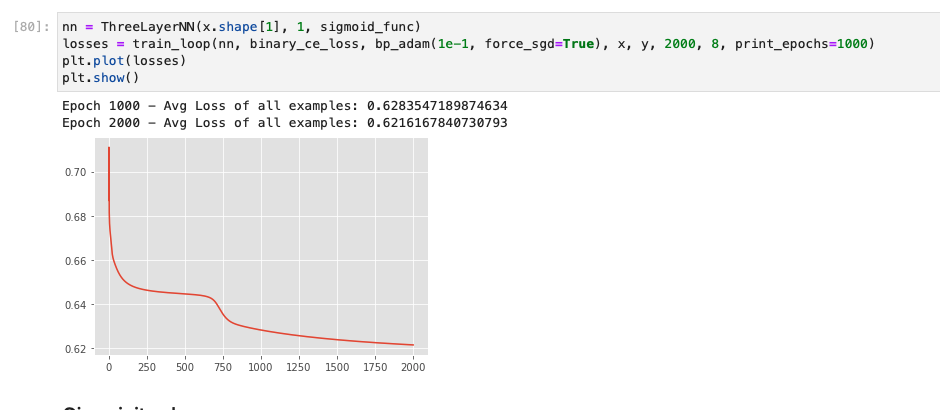
    

- Every run with given init scheme of 0.5, -0.5 there was no instability ever. All of them were similar and stable to curve as shown below

    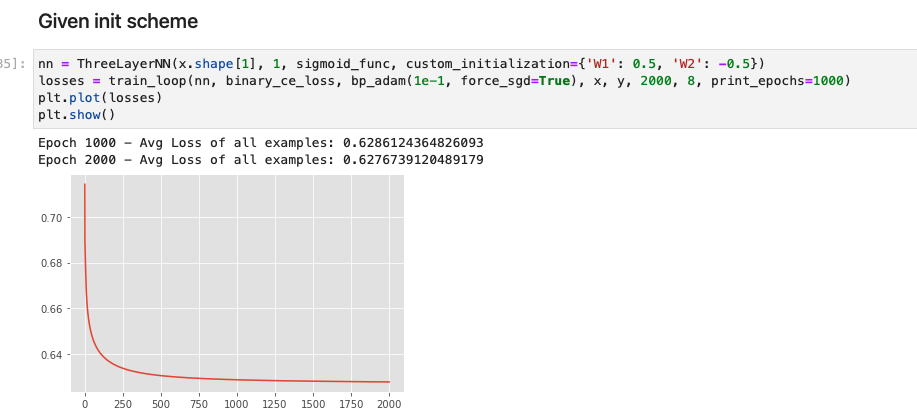
    
- We conclude by this experiment that with random init of weights, the given neural net can cause numerical instability and not learn at all
- Where as the given init scheme is a good one and we can be sure that NN learns always without diverging and jumping around for proper learning rate

## Problem 5

### Wine Quality Dataset

In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2021-03-12 20:59:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv.1’

winequality-white.c 100%[===================>] 258.23K   224KB/s    in 1.2s    

2021-03-12 20:59:36 (224 KB/s) - ‘winequality-white.csv.1’ saved [264426/264426]



In [16]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [19]:
train_split = df.sample(frac=0.7)
test_split = df.drop(train_split.index).sample(frac=1)
print(len(train_split), len(test_split))

3429 1469


In [20]:
def getxy(df):
    npar = df.to_numpy()
    return npar[:, :11], npar[:, 11]

train_x, train_y = getxy(train_split)
test_x, test_y = getxy(test_split)

Scale and normalize data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)
print(train_x.shape)
print(test_x.shape)

(3429, 11)
(1469, 11)


### MSE and Activation setup 

In [22]:
relu_dict = {
    'func': lambda x: np.maximum(x, 0),
    'jacobian': lambda x: np.diag(np.where(x.flatten() > 0, 1, 0))
}

tanh_dict =  {
    'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
    'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
}

In [23]:
def mse_loss(out, ref):
    grad = 2*(out - ref)
    loss = np.sum(np.square(grad/2).flatten())
    return loss, grad

In [24]:
def get_mse(nn, ox, oy, div_size=256):
    x_div = np.split(ox, list(range(div_size, ox.shape[0], div_size)))
    y_div = np.split(oy, list(range(div_size, oy.shape[0], div_size)))
    total_loss = 0
    # Iterate through divisions
    for x, y in zip(x_div, y_div):
        out = nn.forward(x)
#         print(out.flatten(), y.flatten())
        y = y.reshape(out.shape)
        loss, _ = mse_loss(out, y)
        total_loss += loss
    return total_loss / ox.shape[0]

Results are stored in the following dict

In [25]:
from collections import namedtuple, OrderedDict
results = OrderedDict()

### Note

Unfortunately Resiliant prop and Quick prop optimizers weren't able to converge. Implementation can be checked. Losses either become none or diverge.

This is expected behaviour for Quick prop because it uses hessian approximation by finite differences, it still is prone to diverge for non convex functions.

But reason for rprop not converging wasn't clear. One clear thing we observed was weights exploading and leading to overflows. This can be due to 2 reasons
- Since rprop doesn't take into account the gradient and just jumps based on direction of gradient with some parameter multiplicaition, this might lead to reaching bad locations in optimization and thus diverge and explode weights from there
- Another reason could be the parameter we have chosen for cliping. Initially (1e-6, 50) was choosen as clip following offical pytorch implementation, but since it was diverging we reduced clip to (1e-8, 1e-2) even then it diverged. 

### Resiliant prop


In [26]:
results['rprop'] = OrderedDict()

In [75]:
# Equations refernce: https://florian.github.io/rprop/
# coeff in this code refers to \eta in the equations. grad denotes the partial derivates
def opt_rp(params, grads, hparams):
    for k in params:
        if k == 'storage':
            continue
        params['storage'][k]['prevGrad'] = params['storage'][k].get('prevGrad', np.random.uniform(-0.001, 0.001, size=grads[k].shape))
        params['storage'][k]['prevCoeff'] = params['storage'][k].get('prevCoeff', np.full(grads[k].shape ,hparams['coeff_min']))
        cond = np.multiply(params['storage'][k]['prevGrad'], grads[k])
        curr_coeff = np.where(cond > 0 + 1e-5, params['storage'][k]['prevGrad'] * hparams['alpha'], params['storage'][k]['prevCoeff'])
        curr_coeff = np.where(cond < 0 - 1e-5, params['storage'][k]['prevGrad'] * hparams['beta'], curr_coeff)
        curr_coeff = np.where(curr_coeff > hparams['coeff_max'], hparams['coeff_max'], curr_coeff)
        curr_coeff = np.where(curr_coeff < hparams['coeff_min'], hparams['coeff_min'], curr_coeff)
        change = np.where(params['storage'][k]['prevGrad'] > 0, 1, -1)
        params[k] -= np.multiply(params['storage'][k]['prevCoeff'], change)
        params['storage'][k]['prevCoeff'] = curr_coeff
        params['storage'][k]['prevGrad'] = grads[k]

def rprop(alpha=1.2, beta=0.5, coeff_min=1e-8, coeff_max=1e-2):
    return {
        'hparams': {
            'alpha': alpha,
            'beta': beta,
            'coeff_min': coeff_min,
            'coeff_max': coeff_max
        },
        'func': opt_rp,
        'label': 'Rprop optimizer'
    }

#### 25 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


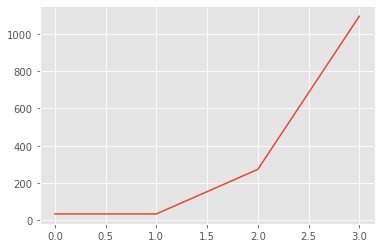

In [63]:
nn = ThreeLayerNN(train_x.shape[1], 25, tanh_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [64]:
results['rprop']['tanh_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['tanh_25'])

(('train_err', nan), ('test_err', nan))


#### ReLU

Epoch 100 - Avg Loss of all examples: 1.1091268332307888e+22
Epoch 200 - Avg Loss of all examples: 3.6111754991848975e+58
Epoch 300 - Avg Loss of all examples: 1.7513319785718382e+96
Epoch 400 - Avg Loss of all examples: 8.273417156748652e+133


<ipython-input-62-1aceb09cabb5>:8: RuntimeWarning: overflow encountered in multiply
  cond = np.multiply(params['storage'][k]['prevGrad'], grads[k])


Epoch 500 - Avg Loss of all examples: 3.7137953519690947e+171
Epoch 600 - Avg Loss of all examples: 1.583994588165371e+209
Epoch 700 - Avg Loss of all examples: 6.4191686967642154e+246
Epoch 800 - Avg Loss of all examples: 2.471636592906473e+284


<ipython-input-35-1f73928606b7>:24: RuntimeWarning: overflow encountered in add
  grad_acuumlator[k] += upd[k]
<ipython-input-62-1aceb09cabb5>:9: RuntimeWarning: overflow encountered in multiply
  curr_coeff = np.where(cond > 0, params['storage'][k]['prevGrad'] * hparams['alpha'], params['storage'][k]['prevGrad'] * hparams['beta'])
<ipython-input-35-1f73928606b7>:20: RuntimeWarning: overflow encountered in double_scalars
  total_loss += loss
<ipython-input-35-1f73928606b7>:24: RuntimeWarning: invalid value encountered in add
  grad_acuumlator[k] += upd[k]
<ipython-input-23-723d45cd14ba>:3: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(grad/2).flatten())


Stopping iterations, loss reached nan


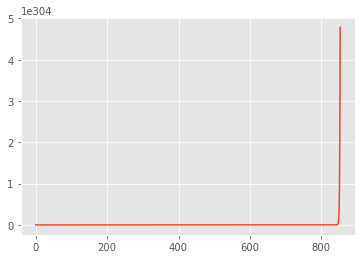

In [65]:
nn = ThreeLayerNN(train_x.shape[1], 25, relu_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [66]:
results['rprop']['relu_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['relu_25'])

(('train_err', nan), ('test_err', nan))


#### 50 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in multiply
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


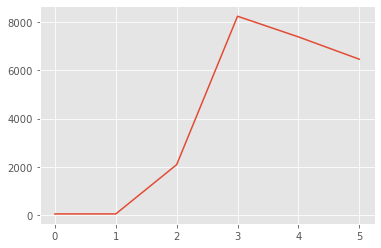

In [67]:
nn = ThreeLayerNN(train_x.shape[1], 50, tanh_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [68]:
results['rprop']['tanh_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['tanh_50'])

(('train_err', nan), ('test_err', nan))


#### ReLU

<ipython-input-62-1aceb09cabb5>:8: RuntimeWarning: overflow encountered in multiply
  cond = np.multiply(params['storage'][k]['prevGrad'], grads[k])
<ipython-input-23-723d45cd14ba>:3: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(grad/2).flatten())
<ipython-input-23-723d45cd14ba>:2: RuntimeWarning: overflow encountered in multiply
  grad = 2*(out - ref)


Stopping iterations, loss reached nan


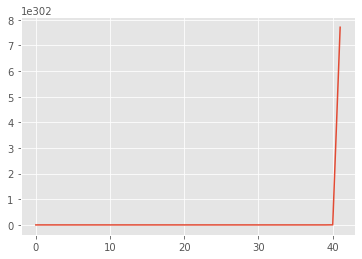

In [69]:
nn = ThreeLayerNN(train_x.shape[1], 50, relu_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [70]:
results['rprop']['relu_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['relu_50'])

(('train_err', nan), ('test_err', nan))


#### 75 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


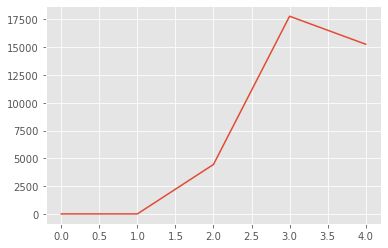

In [71]:
nn = ThreeLayerNN(train_x.shape[1], 75, tanh_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [72]:
results['rprop']['tanh_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['tanh_75'])

(('train_err', nan), ('test_err', nan))


#### ReLU

Epoch 100 - Avg Loss of all examples: 8.154968593692357e+95


<ipython-input-62-1aceb09cabb5>:8: RuntimeWarning: overflow encountered in multiply
  cond = np.multiply(params['storage'][k]['prevGrad'], grads[k])


Epoch 200 - Avg Loss of all examples: 2.3639830494419917e+194
Epoch 300 - Avg Loss of all examples: 6.559484324658767e+292


<ipython-input-35-1f73928606b7>:24: RuntimeWarning: overflow encountered in add
  grad_acuumlator[k] += upd[k]
<ipython-input-35-1f73928606b7>:20: RuntimeWarning: overflow encountered in double_scalars
  total_loss += loss
<ipython-input-23-723d45cd14ba>:3: RuntimeWarning: overflow encountered in square
  loss = np.sum(np.square(grad/2).flatten())


Epoch 400 - Avg Loss of all examples: inf
Epoch 500 - Avg Loss of all examples: inf
Epoch 600 - Avg Loss of all examples: inf


<ipython-input-62-1aceb09cabb5>:9: RuntimeWarning: overflow encountered in multiply
  curr_coeff = np.where(cond > 0, params['storage'][k]['prevGrad'] * hparams['alpha'], params['storage'][k]['prevGrad'] * hparams['beta'])


Stopping iterations, loss reached nan


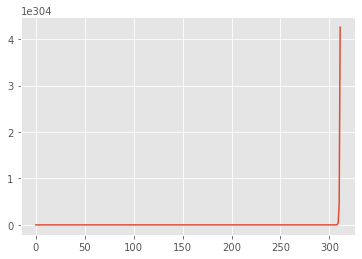

In [73]:
nn = ThreeLayerNN(train_x.shape[1], 75, relu_dict)
losses = train_loop(nn, mse_loss, rprop(), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [74]:
results['rprop']['relu_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['rprop']['relu_75'])

(('train_err', nan), ('test_err', nan))


### Quick prop

> Divergences and overflows observed in the following runs as part of quick prop is expected as we know that it is prone to instability for non convex functions (we used non convex MLP here)

In [48]:
results['qprop'] = OrderedDict()

In [49]:
def opt_qp(params, grads, hparams):
    for k in params:
        if k == 'storage':
            continue
        params['storage'][k]['prevGrad'] = params['storage'][k].get('prevGrad', np.random.uniform(-0.001, 0.001, size=grads[k].shape))
        params['storage'][k]['prevDel'] = params['storage'][k].get('prevDel', np.ones(grads[k].shape))
        coeff = np.divide(params['storage'][k]['prevDel'], (grads[k] - params['storage'][k]['prevGrad']) + 1e-8)
        params[k] -= np.multiply(coeff, grads[k])

def quickprop():
    return {
        'hparams': {},
        'func': opt_qp,
        'label': 'Quickprop optmizer'
    }

#### 25 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


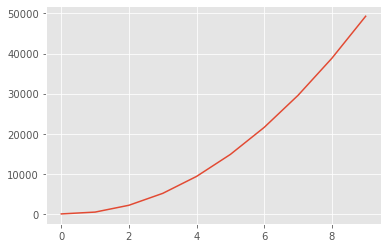

In [50]:
nn = ThreeLayerNN(train_x.shape[1], 25, tanh_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [51]:
results['qprop']['tanh_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['tanh_25'])

(('train_err', nan), ('test_err', nan))


#### ReLU

Epoch 100 - Avg Loss of all examples: 238498286822.13116
Epoch 200 - Avg Loss of all examples: 3893639775514.5396
Epoch 300 - Avg Loss of all examples: 19843966927625.63
Epoch 400 - Avg Loss of all examples: 62926789764709.18
Epoch 500 - Avg Loss of all examples: 153938185871155.97
Epoch 600 - Avg Loss of all examples: 319633000394193.5
Epoch 700 - Avg Loss of all examples: 592724846043886.8
Epoch 800 - Avg Loss of all examples: 1011886103093138.0
Epoch 900 - Avg Loss of all examples: 1621747919377683.2
Epoch 1000 - Avg Loss of all examples: 2472900210296100.5


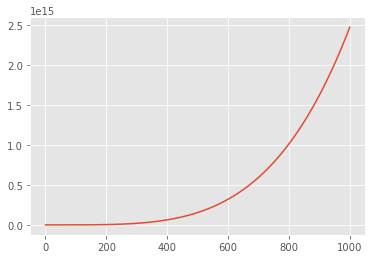

In [52]:
nn = ThreeLayerNN(train_x.shape[1], 25, relu_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [53]:
results['qprop']['relu_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['relu_25'])

(('train_err', 2472900210296100.5), ('test_err', 2214089869130659.0))


#### 50 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


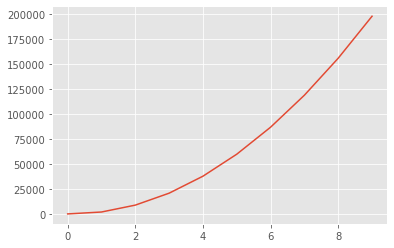

In [54]:
nn = ThreeLayerNN(train_x.shape[1], 50, tanh_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [55]:
results['qprop']['tanh_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['tanh_50'])

(('train_err', nan), ('test_err', nan))


#### ReLU

Epoch 100 - Avg Loss of all examples: 954038714638.8065
Epoch 200 - Avg Loss of all examples: 15574953966467.926
Epoch 300 - Avg Loss of all examples: 79377234910128.7
Epoch 400 - Avg Loss of all examples: 251710440941064.6
Epoch 500 - Avg Loss of all examples: 615759201706067.8
Epoch 600 - Avg Loss of all examples: 1278543217103273.0
Epoch 700 - Avg Loss of all examples: 2370917257282172.0
Epoch 800 - Avg Loss of all examples: 4047571162643606.0
Epoch 900 - Avg Loss of all examples: 6487029843839749.0
Epoch 1000 - Avg Loss of all examples: 9891653281774128.0


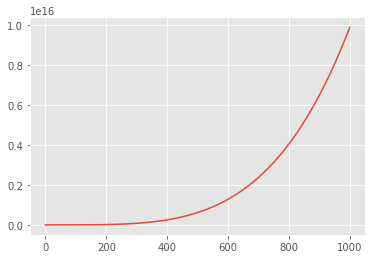

In [56]:
nn = ThreeLayerNN(train_x.shape[1], 50, relu_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [57]:
results['qprop']['relu_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['relu_50'])

(('train_err', 9891653281774128.0), ('test_err', 8856405737986134.0))


#### 75 hidden nodes

#### Tanh

<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in square
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:7: RuntimeWarning: overflow encountered in exp
  'func': lambda x: 2 / (1 + np.exp(-2*x)) - 1,
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: overflow encountered in exp
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())
<ipython-input-22-d2f224bea54e>:8: RuntimeWarning: invalid value encountered in true_divide
  'jacobian': lambda x: np.diag(np.divide(4*np.exp(-2*x), np.square(1+np.exp(-2*x)) + 1e-8).flatten())


Stopping iterations, loss reached nan


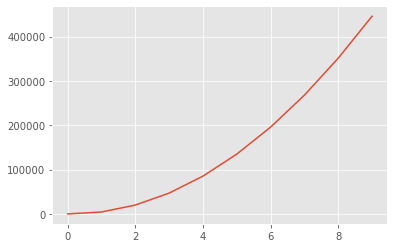

In [58]:
nn = ThreeLayerNN(train_x.shape[1], 75, tanh_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [59]:
results['qprop']['tanh_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['tanh_75'])

(('train_err', nan), ('test_err', nan))


#### ReLU

Epoch 100 - Avg Loss of all examples: 2146466865530.1643
Epoch 200 - Avg Loss of all examples: 35042688428551.598
Epoch 300 - Avg Loss of all examples: 178595549915794.56
Epoch 400 - Avg Loss of all examples: 566340844596176.9
Epoch 500 - Avg Loss of all examples: 1385443273804152.2
Epoch 600 - Avg Loss of all examples: 2876696446939716.5
Epoch 700 - Avg Loss of all examples: 5334522881468371.0
Epoch 800 - Avg Loss of all examples: 9106974002921176.0
Epoch 900 - Avg Loss of all examples: 1.4595730144894728e+16
Epoch 1000 - Avg Loss of all examples: 2.2256100549051156e+16


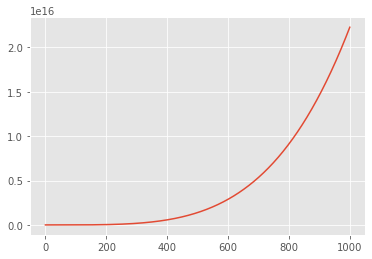

In [60]:
nn = ThreeLayerNN(train_x.shape[1], 75, relu_dict)
losses = train_loop(nn, mse_loss, quickprop(), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [61]:
results['qprop']['relu_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['qprop']['relu_75'])

(('train_err', 2.225610054905111e+16), ('test_err', 1.9926807000086204e+16))


### Backpropagation

- We use the adam backprop optimizer we already defined previously for problem 4

In [76]:
results['backprop'] = OrderedDict()

#### 25 hidden nodes

#### Tanh

Epoch 100 - Avg Loss of all examples: 1.1794727886271734
Epoch 200 - Avg Loss of all examples: 1.6331322845726663
Epoch 300 - Avg Loss of all examples: 1.2571926932760695
Epoch 400 - Avg Loss of all examples: 1.1162954098581477
Epoch 500 - Avg Loss of all examples: 1.124122207597925
Epoch 600 - Avg Loss of all examples: 0.952347063972086
Epoch 700 - Avg Loss of all examples: 0.7959579466522112
Epoch 800 - Avg Loss of all examples: 0.6455223778263807
Epoch 900 - Avg Loss of all examples: 0.5542239205509507
Epoch 1000 - Avg Loss of all examples: 0.5247970312840262


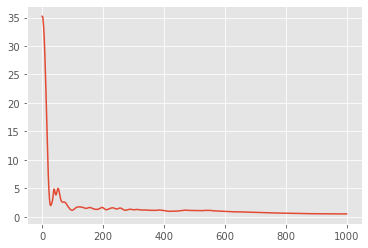

In [77]:
nn = ThreeLayerNN(train_x.shape[1], 25, tanh_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [78]:
results['backprop']['tanh_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['tanh_25'])

(('train_err', 0.5247970312840264), ('test_err', 0.5417003068885476))


#### ReLU

Epoch 100 - Avg Loss of all examples: 2.471413753788184
Epoch 200 - Avg Loss of all examples: 0.6475931942299106
Epoch 300 - Avg Loss of all examples: 0.5360168231641089
Epoch 400 - Avg Loss of all examples: 0.5196953118333202
Epoch 500 - Avg Loss of all examples: 0.5114324439823332
Epoch 600 - Avg Loss of all examples: 0.5095635969235769
Epoch 700 - Avg Loss of all examples: 0.5059091400401723
Epoch 800 - Avg Loss of all examples: 0.503614090191233
Epoch 900 - Avg Loss of all examples: 0.5021427591899907
Epoch 1000 - Avg Loss of all examples: 0.5010980544021715


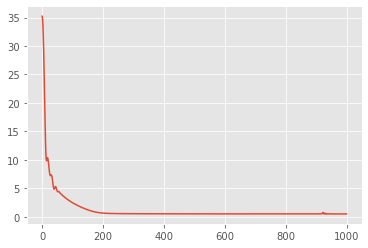

In [79]:
nn = ThreeLayerNN(train_x.shape[1], 25, relu_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 8, print_epochs=100) 
plt.plot(losses)
plt.show()

In [80]:
results['backprop']['relu_25'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['relu_25'])

(('train_err', 0.5010980544021715), ('test_err', 0.5312546212834426))


#### 50 hidden nodes

#### Tanh

Epoch 100 - Avg Loss of all examples: 0.8436549378359253
Epoch 200 - Avg Loss of all examples: 0.9362914944799413
Epoch 300 - Avg Loss of all examples: 0.8348329846955416
Epoch 400 - Avg Loss of all examples: 0.7452577553377588
Epoch 500 - Avg Loss of all examples: 0.6959607328883227
Epoch 600 - Avg Loss of all examples: 0.7155163350323276
Epoch 700 - Avg Loss of all examples: 0.6738228243268105
Epoch 800 - Avg Loss of all examples: 0.6635356717152898
Epoch 900 - Avg Loss of all examples: 0.6497793345454348
Epoch 1000 - Avg Loss of all examples: 0.6408862192816116


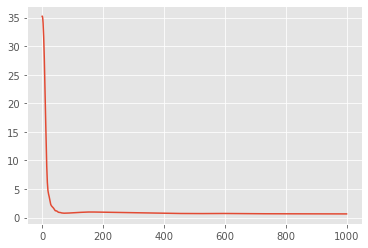

In [81]:
nn = ThreeLayerNN(train_x.shape[1], 50, tanh_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [82]:
results['backprop']['tanh_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['tanh_50'])

(('train_err', 0.640886219281612), ('test_err', 0.7043576009610113))


#### ReLU

Epoch 100 - Avg Loss of all examples: 2.322752472367156
Epoch 200 - Avg Loss of all examples: 1.808720932711522
Epoch 300 - Avg Loss of all examples: 1.5451956146734156
Epoch 400 - Avg Loss of all examples: 1.4075623001383437
Epoch 500 - Avg Loss of all examples: 1.25902726149802
Epoch 600 - Avg Loss of all examples: 1.29894907702771
Epoch 700 - Avg Loss of all examples: 1.1755030023023396
Epoch 800 - Avg Loss of all examples: 1.1381611778286986
Epoch 900 - Avg Loss of all examples: 1.301530093497319
Epoch 1000 - Avg Loss of all examples: 1.1633613494659452


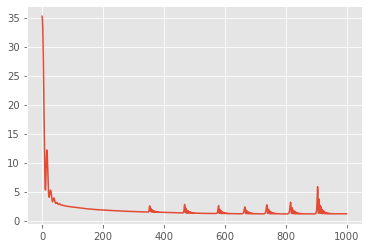

In [83]:
nn = ThreeLayerNN(train_x.shape[1], 50, relu_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 4, print_epochs=100) 
plt.plot(losses)
plt.show()

In [84]:
results['backprop']['relu_50'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['relu_50'])

(('train_err', 1.1633613494659465), ('test_err', 1.3135686059122897))


#### 75 hidden nodes

#### Tanh

Epoch 100 - Avg Loss of all examples: 0.7579478985090007
Epoch 200 - Avg Loss of all examples: 0.6889255213773677
Epoch 300 - Avg Loss of all examples: 0.6530135496302827
Epoch 400 - Avg Loss of all examples: 0.6455240574401934
Epoch 500 - Avg Loss of all examples: 0.6201992563109892
Epoch 600 - Avg Loss of all examples: 0.5998179799475358
Epoch 700 - Avg Loss of all examples: 0.5972463064235645
Epoch 800 - Avg Loss of all examples: 0.592648004596448
Epoch 900 - Avg Loss of all examples: 0.5792665371903114
Epoch 1000 - Avg Loss of all examples: 0.5714804989786229


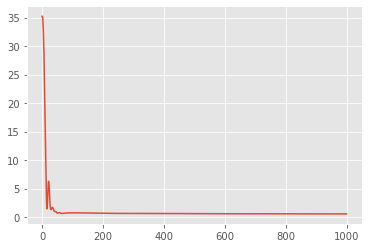

In [85]:
nn = ThreeLayerNN(train_x.shape[1], 75, tanh_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [86]:
results['backprop']['tanh_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['tanh_75'])

(('train_err', 0.5714804989786227), ('test_err', 0.6188591636142142))


#### ReLU

Epoch 100 - Avg Loss of all examples: 1.9219551544803535
Epoch 200 - Avg Loss of all examples: 1.3918316715428498
Epoch 300 - Avg Loss of all examples: 0.9567373200113546
Epoch 400 - Avg Loss of all examples: 0.7223563157104472
Epoch 500 - Avg Loss of all examples: 0.6656293339060965
Epoch 600 - Avg Loss of all examples: 0.6477064972687941
Epoch 700 - Avg Loss of all examples: 0.6243139637440657
Epoch 800 - Avg Loss of all examples: 0.6315032087853504
Epoch 900 - Avg Loss of all examples: 0.6543024586077253
Epoch 1000 - Avg Loss of all examples: 0.6753530487596149


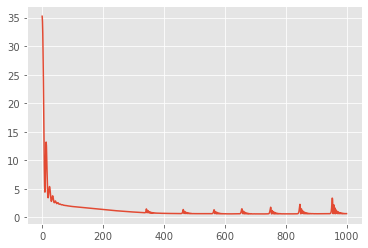

In [87]:
nn = ThreeLayerNN(train_x.shape[1], 75, relu_dict)
losses = train_loop(nn, mse_loss, bp_adam(2e-2), train_x, train_y, 1000, 3, print_epochs=100) 
plt.plot(losses)
plt.show()

In [88]:
results['backprop']['relu_75'] = (('train_err', get_mse(nn, train_x, train_y)), ('test_err', get_mse(nn, test_x, test_y)))
print(results['backprop']['relu_75'])

(('train_err', 0.6753530487596147), ('test_err', 0.7216811177877742))


### Results and observations

In [89]:
for k in results:
    print(f"For {k}")
    for t in results[k]:
        print(f"\t {t} : {results[k][t]}")

For rprop
	 tanh_25 : (('train_err', nan), ('test_err', nan))
	 relu_25 : (('train_err', nan), ('test_err', nan))
	 tanh_50 : (('train_err', nan), ('test_err', nan))
	 relu_50 : (('train_err', nan), ('test_err', nan))
	 tanh_75 : (('train_err', nan), ('test_err', nan))
	 relu_75 : (('train_err', nan), ('test_err', nan))
For qprop
	 tanh_25 : (('train_err', nan), ('test_err', nan))
	 relu_25 : (('train_err', 2472900210296100.5), ('test_err', 2214089869130659.0))
	 tanh_50 : (('train_err', nan), ('test_err', nan))
	 relu_50 : (('train_err', 9891653281774128.0), ('test_err', 8856405737986134.0))
	 tanh_75 : (('train_err', nan), ('test_err', nan))
	 relu_75 : (('train_err', 2.225610054905111e+16), ('test_err', 1.9926807000086204e+16))
For backprop
	 tanh_25 : (('train_err', 0.5247970312840264), ('test_err', 0.5417003068885476))
	 relu_25 : (('train_err', 0.5010980544021715), ('test_err', 0.5312546212834426))
	 tanh_50 : (('train_err', 0.640886219281612), ('test_err', 0.7043576009610113))
	

We can make the follwoing observatvations from MSE Plots and errors we obtained:

- Quickprop doesn't work for this MLP. This was expected as it doesn't work well for non convex functions as explained in class
- This is expected behaviour for Quick prop because it uses hessian approximation by finite differences, it still is prone to diverge for non convex functions.

But reason for rprop not converging wasn't clear. One clear thing we observed was weights exploading and leading to overflows. This can be due to 2 reasons
- Since rprop doesn't take into account the gradient and just jumps based on direction of gradient with some parameter multiplicaition, this might lead to reaching bad locations in optimization and thus diverge and explode weights from there
- Another reason could be the parameter we have chosen for cliping. Initially (1e-6, 50) was choosen as clip following pytorh implementation, but since it was diverging we reduced clip to (1e-8, 1e-2) even then it diverged. 

In the good case of backprop we can do the following analysis:

In terms of dimension of hidden layer
- 25 hidden dimension was the best, followed by 75 and then 50
- Explanation for why 25 was the best:
    - As hidden dimensions increases the number of parameters also increases with it linearly
    - But the data we have is limited
    - Due to curse of a dimensionality after a point we don't get benefit by increasing dimension but instead get somewhat worse results than we got previously
    - As we can obsereve from the plots since the parameters are more for 50 and 75 their plots have a more jitter in loss compared to 25's plot
- Observation was peculiar regarding 50 on why it was worst and we have don't have a solid reasoning for that this might even be due to initialization

In terms of activation used:
- Clearly in all cases tanh was the best and relu was worse
- One reason can be attributed to no training signal on -ve side of relu
- Second being that tanh limits range to -1 to 1 where as relu doesn't have this limit and might have some effect on learning dynamics of network
- In general nns this isn't much of a problem because we have weight regularization term in loss to ensure weights don't become large
- But this problem's NN doesn't have any regularization thus it can be that relu performed worse tanh
- Also due to the step function type gradient in relu, we can see lot of jitter in loss especially in larger ones of 50 and 75 as training progress, after 350 epochs

## Problem 6

- Let vector of train samples be $X \in R^{3 x 400}$, where each each column represents $\begin{bmatrix} x_{1i} \\ x_{2i} \\ 1 \end{bmatrix}$ 
-  $Y \in R^{400 x 1}$ denote the targets where row i contains $y_i \in \{ -1, +1 \}$
- With similar notations of columns let test samples be denoted by $X_{test} \in R^{3 x 200}$ and $Y_{test} \in R^{200 x 1}$
- Let three weights for our problem be denoted as $W = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} \in R^{3x1}$
- Objective function to be minimized is Mean Squared Error
    - It can be simplified in vector form as as $J(W) = \frac{1}{400}[ X^T W - Y ]^T [ X^T W - Y] $
    - Jacobian of objective $J^{'}(W) = \frac{2}{400}[XX^T W - XY]$

### Generate Data

In [3]:
m1 = np.array([-3, 4])
m2 = np.array([4, -3])
cov = np.array([[16, 0], [0, 9]])

pos_x = np.random.multivariate_normal(m1, cov, 200)
pos_x = np.hstack([pos_x, np.ones(200).reshape(200, 1)])
neg_x = np.random.multivariate_normal(m2, cov, 200)
neg_x = np.hstack([neg_x, np.ones(200).reshape(200, 1)])

X = np.vstack([pos_x, neg_x]).T
Y = np.hstack([np.ones(200), -np.ones(200)]).reshape(-1, 1)

pos_x_test = np.random.multivariate_normal(m1, cov, 100)
pos_x_test = np.hstack([pos_x_test, np.ones(100).reshape(100, 1)])
neg_x_test = np.random.multivariate_normal(m2, cov, 100)
neg_x_test = np.hstack([neg_x_test, np.ones(100).reshape(100, 1)])

X_test = np.vstack([pos_x_test, neg_x_test]).T
Y_test = np.hstack([np.ones(100), -np.ones(100)]).reshape(-1, 1)

### Setup functions for our gradient descent

In [4]:
def obj_func(w1, w2, w3):
    W = np.array([w1, w2, w3]).reshape(-1, 1)
    return np.linalg.norm(np.dot(X.T, W) - Y) / 400

def test_err_fn(w1, w2, w3):
    W = np.array([w1, w2, w3]).reshape(-1, 1)
    return np.linalg.norm(np.dot(X_test.T, W) - Y_test) / 200

def grad_obj_func(w1, w2, w3):
    W = np.array([w1, w2, w3]).reshape(-1, 1)
    xxt = np.dot(X, X.T)
    return (2*(np.dot(xxt, W) - np.dot(X, Y))).flatten() / 400

In [5]:
prob6_dict = {
    'func': obj_func,
    'grad': grad_obj_func,
    'label': 'Linear Regression Problem 6',
    # These are dummy and wont be used for this problem 6 just for sake of reusing old code
    'x_range': (-30, 30),
    'y_range': (-30, 30),
    'lin_count': 100,
    'lines': 20,
    'ab': True,
}


### Optimal Learning rate by emprical trail and error and train to minimum error

In [6]:
e = Experiment(prob6_dict, const_stepsize(2e-2), no_plot=True) # greater than 2e-2 diverges
train_err, test_err = e.descent(np.random.uniform(size=(3,)), tresh=1e-6, get_err=True, get_fn=test_err_fn)
print(f"In {len(train_err)} iterations")
print(f"Final train error {train_err[-1]}, test error {test_err[-1]}")

Abs change in postition in this update:  [2.80007289e-05 3.02085387e-05 6.06307803e-04]
At:  [-0.07417351  0.12002561  0.00536928]  has value:  0.02873611299867669
Converged, change in function value after update over 5 continous iterations <= 1e-06
In 100 iterations
Final train error 0.02873611299867669, test error 0.040105028722836965


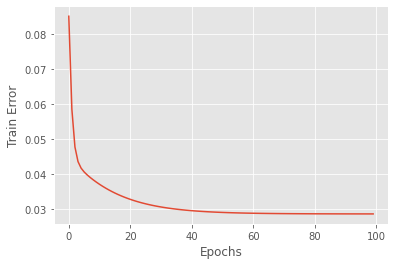

In [7]:
plt.plot(train_err)
plt.xlabel("Epochs")
plt.ylabel("Train Error")
plt.show()

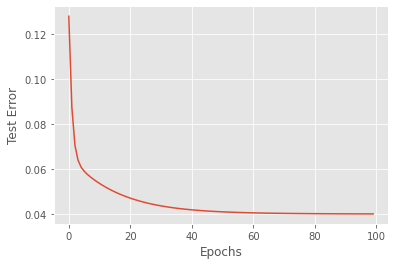

In [8]:
plt.plot(test_err)
plt.xlabel("Epochs")
plt.ylabel("Test Error")
plt.show()

### Why is there no danger of overfitting?

- This function is linear perceptron - simplest sensible function (i.e., ignoring random functions) we can fit
- There are no square terms or any layers or activations thus our model won't over fit to the data
- It just learns a linear decision boundary from the data it is presented with
- This is also evident from train and test errors we have shown earlier

### Is it possible to achieve minimum bayes error with this function?

- Yes, because here data is from two gaussians which have the same covariance matrix but means are different
- Thus minimum bayes classifier we can get is the plane passing through middle of line joining the means, which can be represented by linear perceptron
- Given enough samples our network is capable to learn this plane exactly, hence it is possible to achieve minimum bayes error

### Mean subtracted and std scaled learning

In [9]:
X

array([[-3.49227449, -0.9480352 , -4.77969909, ...,  4.34147837,
         5.32476756,  7.1346155 ],
       [ 1.56687531,  1.52567121,  5.16742904, ..., -4.1742947 ,
        -6.2409689 , -4.45146792],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [10]:
X = np.divide((X - np.mean(X, axis=1).reshape(-1,1)), np.std(X, axis=1).reshape(-1,1))
X[2, :] = 0 # Handle 0 / 0 in prev step
print(X)

# do the same for test set
X_test = np.divide((X_test - np.mean(X_test, axis=1).reshape(-1,1)), np.std(X_test, axis=1).reshape(-1,1))
X_test[2, :] = 0 # Handle 0 / 0 in prev step

[[-0.79240825 -0.29928139 -1.0419381  ...  0.72593711  0.91651915
   1.26730559]
 [ 0.24504425  0.23604336  1.03157268 ... -1.00909434 -1.46055212
  -1.06964186]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


<ipython-input-10-e9e10a75261a>:1: RuntimeWarning: invalid value encountered in true_divide
  X = np.divide((X - np.mean(X, axis=1).reshape(-1,1)), np.std(X, axis=1).reshape(-1,1))
<ipython-input-10-e9e10a75261a>:6: RuntimeWarning: invalid value encountered in true_divide
  X_test = np.divide((X_test - np.mean(X_test, axis=1).reshape(-1,1)), np.std(X_test, axis=1).reshape(-1,1))


In [11]:
e = Experiment(prob6_dict, const_stepsize(6e-1), no_plot=True) # greater than 6e-1 diverges
train_err, test_err = e.descent(np.random.uniform(size=(3,)), tresh=1e-6, get_err=True, get_fn=test_err_fn)
print(f"In {len(train_err)} iterations")
print(f"Final train error {train_err[-1]}, test error {test_err[-1]}")

Abs change in postition in this update:  [0.00453474 0.00453474 0.        ]
At:  [-0.37697635  0.55089214  0.3406636 ]  has value:  0.028726896502248023
Converged, change in function value after update over 5 continous iterations <= 1e-06
In 31 iterations
Final train error 0.028726896502248023, test error 0.040034783120085564


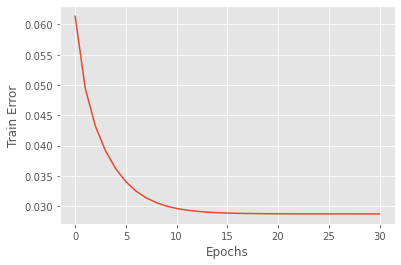

In [12]:
plt.plot(train_err)
plt.xlabel("Epochs")
plt.ylabel("Train Error")
plt.show()

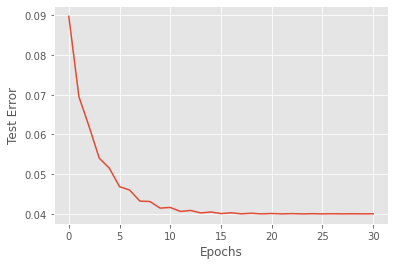

In [13]:
plt.plot(test_err)
plt.xlabel("Epochs")
plt.ylabel("Test Error")
plt.show()

### Observations

- Without preprocessing of data, we were able to use only 2e-2 as our learning rate and higher ones diverged
- After preprocesssing the data, we can now use learning rate of 6e-1 without any issues
- This reduced number of iterations for convergence from 100 to 31 in this particular run, which is 3x speed up in learning which we got by just preprocessing